In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

음의 상관관계
ex)
물건을 예로 들어보자
a 에서 b 가 0.9801672498621 일때면 a를 살때 b가 0.9면 a를 살때 b의 구매율도 높다는거다
a 에서 c 가 -2.39182 dlaus a를 살때 c가 안팔린다는 소리다

날씨가 좋으면 난방비가 내려간다 <= 이것이 음의 상관관계


데이터를 처리할때 누락이 되어있으면 에러가 난다
그래서 전처리가 중요하다
사소한 Missing Data 때문에 에러가 발생한다

누락 데이터 확인
• isnull() : 누락 데이터이면 True를 반환하고, 유효한 데이터가 존재하면 False를 반환
• notnull() : 유효한 데이터가 존재하면 True를 반환하고, 누락 데이터이면 False를 반환

누락 데이터 제거
• 행 제거: DataFrame객체.dropna(subset=column명 리스트, how='any'/'all', axis=0,
thresh=개수)
• 열 제거: DataFrame객체.dropna(axis=1, thresh=개수)
• thresh : 유효한 값의 개수가 thresh의 값보다 작은 행이나 열을 삭제

  NaN으로 표시된 데이터는 0으로 바꿔주던지 하면 에러가 나지 않는다
 
 
 ▪ 누락 데이터 치환
• DataFrame객체['column명'].fillna(값)
✓ 새로운 객체 반환
• DataFrame객체['column명'].fillna(값, inplace=True)



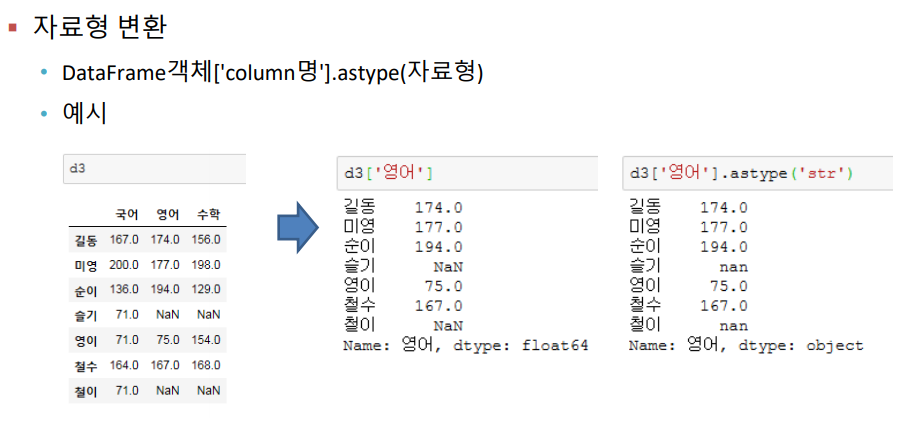

한 column만 str로 만들고 싶다면 이렇게...

In [5]:
data_list = [
    {'yyyy-mm-dd' : '1996-06-27', 'city' : 'incheon'},
    {'yyyy-mm-dd' : '2000-10-10', 'city' : 'seoul'},
    {'yyyy-mm-dd' : '1992-02-10', 'city' : 'kyungi'}
]

In [7]:
df = pd.DataFrame(data_list , columns=['yyyy-mm-dd', 'city'])

In [8]:
df

,yyyy-mm-dd,city
0,1996-06-27,incheon
1,2000-10-10,seoul
2,1992-02-10,kyungi


In [11]:
# def year(xx):
#     xx[0:index('-')]
    
df['year'] = df['yyyy-mm-dd'].apply(lambda row: row.split('-')[0])

In [12]:
df

,yyyy-mm-dd,city,year
0,1996-06-27,incheon,1996
1,2000-10-10,seoul,2000
2,1992-02-10,kyungi,1992


In [15]:
df['age'] = df['year'].apply(lambda x : 2020-int(x))

In [16]:
df

,yyyy-mm-dd,city,year,age
0,1996-06-27,incheon,1996,24
1,2000-10-10,seoul,2000,20
2,1992-02-10,kyungi,1992,28


In [17]:
df.index = [ "김깜비", "조설희", '권통키']

In [18]:
df

,yyyy-mm-dd,city,year,age
김깜비,1996-06-27,incheon,1996,24
조설희,2000-10-10,seoul,2000,20
권통키,1992-02-10,kyungi,1992,28


In [25]:
'seoul' in df.city.values

True

In [38]:
df = pd.DataFrame([
    {1,2,3},
    {4,5,6},
    {7,8,9},
    {10,11,12}
])

In [39]:
df

,0,1,2
0,1,2,3
1,4,5,6
2,8,9,7
3,10,11,12


In [40]:
#pandas는 numpy에서 왔다는걸 기억하자

In [41]:
#NaN넣는법
df.iloc[2,0] = np.nan
df.iloc[3,1] = np.nan

In [42]:
df

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6
2,NaN,9.0,7
3,10.0,NaN,12


In [43]:
np.version.version

'1.18.5'

In [45]:
pd.version.version

AttributeError: module 'pandas' has no attribute 'version'

In [46]:
import seaborn as sns

In [47]:
mpg = sns.load_dataset('mpg')

In [48]:
type(mpg)

pandas.core.frame.DataFrame

In [50]:
mpg.info()
#결집치
# 3   horsepower    392 non-null    float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [52]:
mpg.sample(20) # 랜덤으로 20개 뽑는거

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
281,19.8,6,200.0,85.0,2990,18.2,79,usa,mercury zephyr 6
254,20.2,6,200.0,85.0,2965,15.8,78,usa,ford fairmont (auto)
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
188,16.0,8,318.0,150.0,4190,13.0,76,usa,dodge coronet brougham
73,13.0,8,307.0,130.0,4098,14.0,72,usa,chevrolet chevelle concours (sw)
265,17.5,8,318.0,140.0,4080,13.7,78,usa,dodge magnum xe
50,28.0,4,116.0,90.0,2123,14.0,71,europe,opel 1900
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc
100,18.0,6,250.0,88.0,3021,16.5,73,usa,ford maverick
204,32.0,4,85.0,70.0,1990,17.0,76,japan,datsun b-210


In [53]:
mpg[mpg.isna().sum(1) == True]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [54]:
df

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6
2,NaN,9.0,7
3,10.0,NaN,12


In [55]:
df.dropna(axis=0, inplace=True)

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6


In [56]:
df

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6
2,NaN,9.0,7
3,10.0,NaN,12


In [58]:
#NAㄱ밧 채우기 ( 적용 할땐 inplace 체크하고ㅇㅇ)
df.fillna(df.mean(axis=0)) # mean은 평균값
# 실무에선 이렇게 쓰지않고
# 직업/성별/나이 뭐 이런게 있다면
# 그룹을 지어서
# 만일 변호사의 급여가 비어있으면 변호사끼리의 직업군을 무리지어서
# 평균이나 중앙값으로 빈칸을 채우는 식으로 쓴다

,0,1,2
0,1.0,2.000000,3
1,4.0,5.000000,6
2,5.0,9.000000,7
3,10.0,5.333333,12


In [59]:
# 채우는데 앞에 자료 복사해서 채워...
df.fillna(method='pad')

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6
2,4.0,9.0,7
3,10.0,9.0,12


In [60]:
# 채우는데 뒤에것 자료 복사해서 채워...
df.fillna(method='bfill')

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6
2,10.0,9.0,7
3,10.0,NaN,12


In [61]:
df.where(pd.notnull(df))

,0,1,2
0,1.0,2.0,3
1,4.0,5.0,6
2,NaN,9.0,7
3,10.0,NaN,12


In [62]:
pd.notnull(df)

,0,1,2
0,True,True,True
1,True,True,True
2,False,True,True
3,True,False,True


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
import pandas_profiling

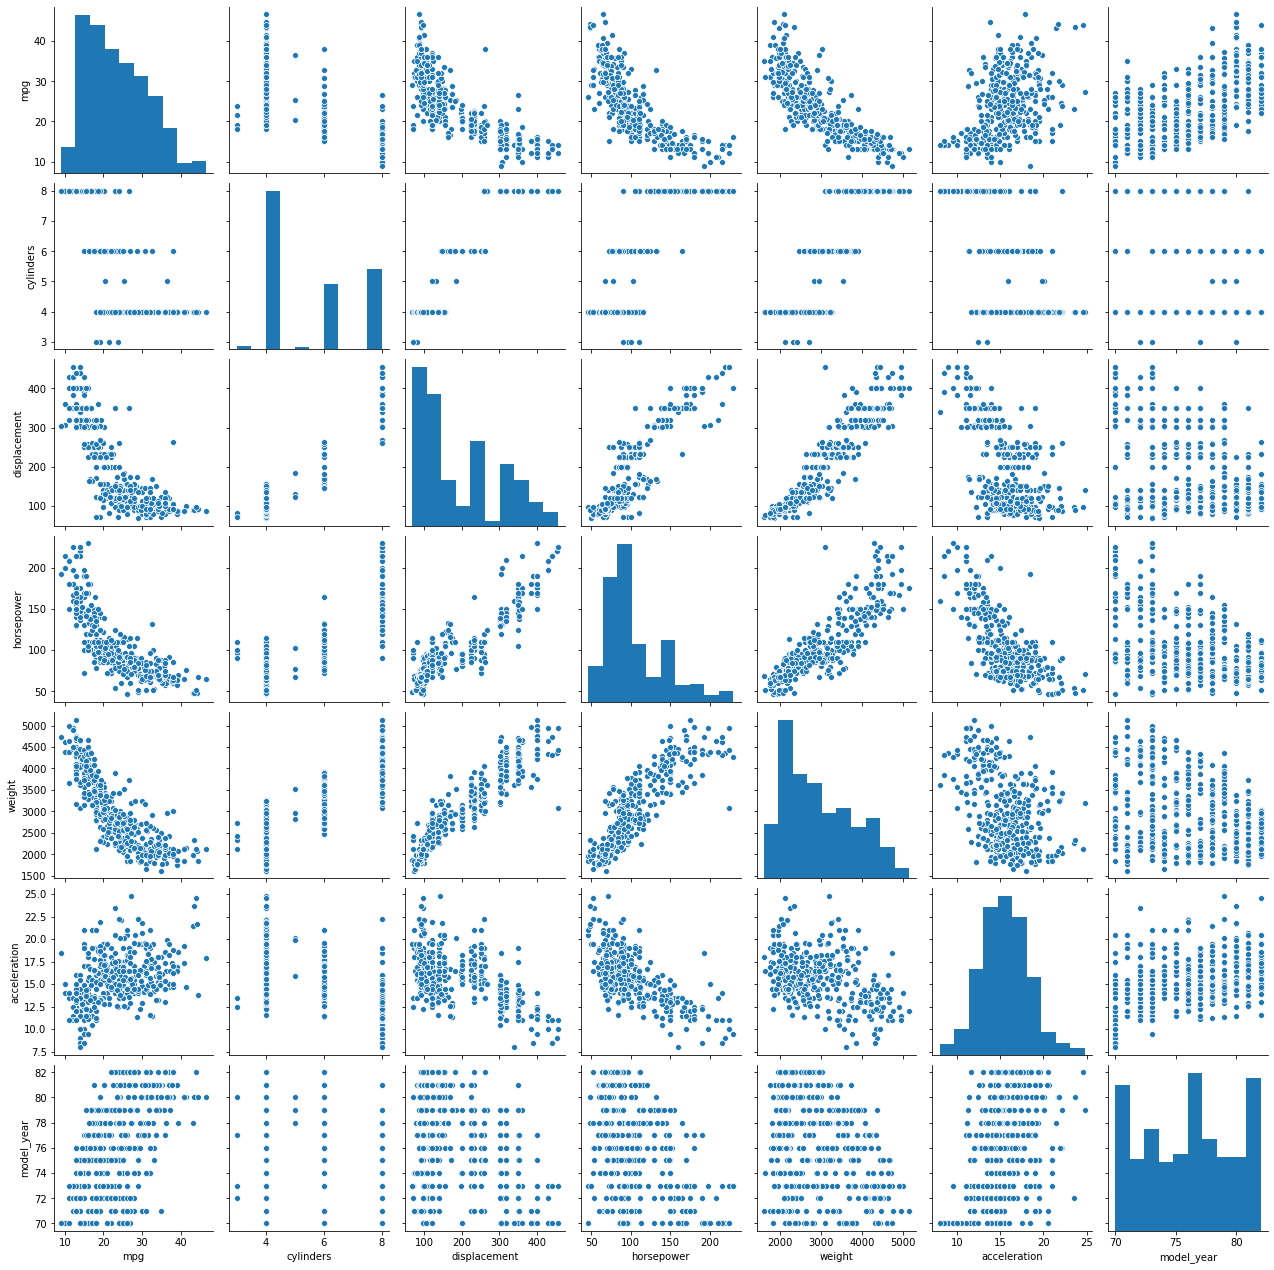

In [68]:
sns.pairplot(mpg)

In [71]:
mpg_data_report = pandas_profiling.ProfileReport(mpg)

In [72]:
mpg_data_report.to_file('mpg_data_report.html')